<a href="https://colab.research.google.com/github/irajamuller/data_science/blob/main/Visualiza%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Matplotlib**
---

## **1.1-Gráfico de Barra**
---
<p align="justify">
Este notebook apresenta exemplos de como criar gráficos em barra com o matplotlib. Gráficos de barras são ferramentas essenciais para representar e comparar categorias de dados de forma visual, utilizando barras de tamanhos proporcionais aos valores que representam. No contexto de aprendizado de máquina, um dos principais usos de gráficos de barras é a análise de dados categóricos, incluindo comparação e análise da distribuição dos dados. Outro uso bastante comum é a geração de histogramas para a análise da frequência de valores de um determinado parâmetro.
</p>
<p align="justify">
Neste notebook iremos trabalhar com os dados de exemplo disponíveis no dataset <strong>tips</strong> que pode ser facilmente acessado através da biblioteca Seaborn. Primeiramente iremos carregar as bibliotecas necessárias para trabalhar com o conjunto de dados.
</p>

In [ ]:
%matplotlib inline # aparecer o gráfico no notebook (algumas ferramentas abrem uma nova janela)
import seaborn as sns # Permite o carregamento do dataset de exemplo
import pandas as pd # Dataframe para manipulação do dataset
import numpy as np # Faremos uso de algumas funções para manipular o dataset
import matplotlib.pyplot as plt # Biblioteca para criação dos gráficos

<p align="justify">
Neste exemplo iremos trabalhar com algumas manipulaçõse de dados simples para analisar a média de gorjetas observada em cada dia da semana presente no conjunto de dados. As células abaixo contêm o código que carrega do conjunto de dados e realiza as manipulações para cálculo das tendências centrais por dias da semana.
</p>

In [ ]:
# Carregar o conjunto de dados
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
'''
Realiza um processo de agrupamento do conjunto de dados de acordo com os valores do atributo `day`.
O agrupamento realiza o cálculo de valores comuns de tendência central, que são mapeados para atributos de um novo dataframe.
'''
mean_tips = tips.groupby("day", observed=True)["tip"].agg(
    mean="mean",
    std="std",
    count="count"
)

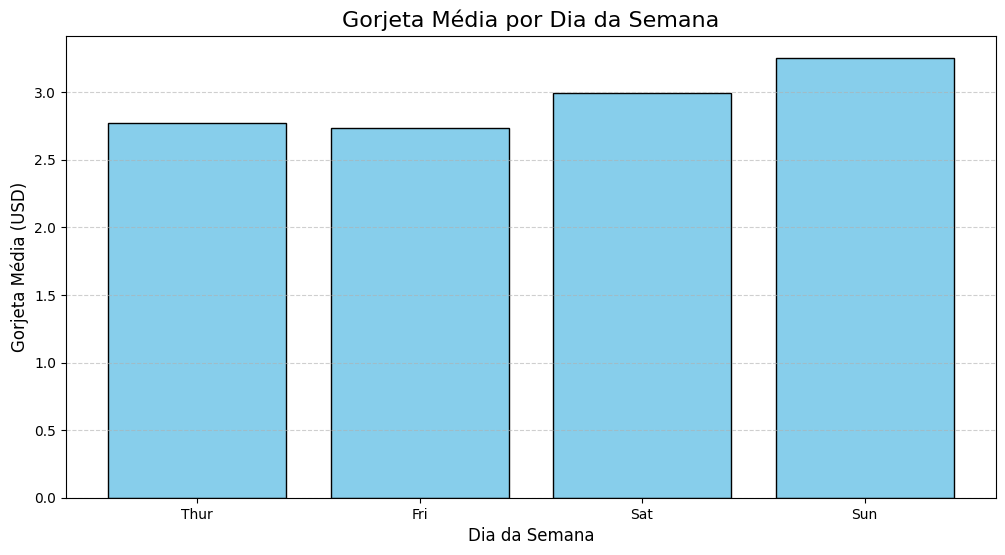

In [ ]:
# Configura o tamanho da figura
plt.figure(figsize=(12, 6))

'''
Cria um gráfico de barras utilizando o Matplotlib. Os primeiros dois parâmetros contém as séries
que possuem, respectivamente, os valores dos eixos horizontal e vertical. Os demais parâmetros
ajustam a estética do gráfico como as cores de preenchimento e de fundo.
'''
plt.bar(mean_tips.index, mean_tips["mean"], color="skyblue", edgecolor="black")
#plt.bar(mean_tips.index, mean_tips["mean"], color=["blue", 'white', 'black', 'green'], edgecolor="black")

# Configura opções gerais de vizualização do gráfico
plt.title("Gorjeta Média por Dia da Semana", fontsize=16)
plt.xlabel("Dia da Semana", fontsize=12)
plt.ylabel("Gorjeta Média (USD)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.xticks(['Thur', 'Fri', 'Sat', 'Sun'], ['Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo'])
#plt.ylim((1,4))
#plt.yticks(np.arange(1, 4, 0.2))
plt.show()

<p align="justify">
No exemplo abaixo, iremos gerar o mesmo tipo de gráfico, mas iremos adicionar uma barra de erros que apresenta o erro médio padrão na forma de uma barra de erros.
</p>
<p align="justify">
O erro médio padrão (SEM) $\frac{\sigma}{\sqrt(n)} $ não é calculado pelo processo de agregação, mas podemos adicioná-lo ao novo dataframe
utilizando os dados que já foram calculados e estão disponíveis no próprio dataset. O erro padrão da média (SEM) mede a precisão da estimativa da média de um grupo. Ele é útil, por exemplo, para: construir intervalos de confiança da média e adição de barras de erro em gráficos.
</p>

In [ ]:
mean_tips["sem"] = mean_tips["std"] / np.sqrt(mean_tips["count"])
mean_tips

,mean,std,count,sem
day,,,,
Thur,2.771452,1.240223,62,0.157509
Fri,2.734737,1.019577,19,0.233907
Sat,2.993103,1.631014,87,0.174863
Sun,3.255132,1.234880,76,0.141650


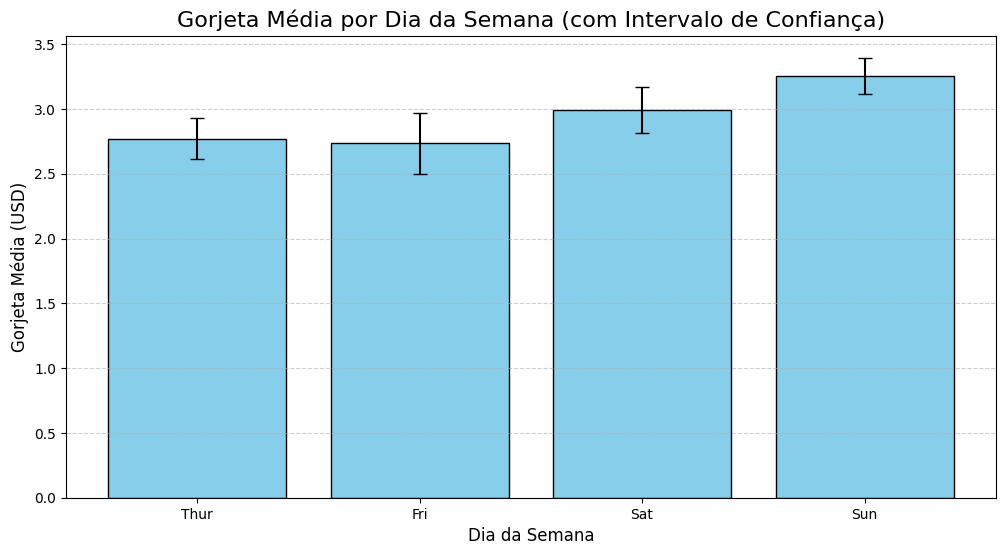

In [ ]:
# Configura o tamanho da figura
plt.figure(figsize=(12, 6))

'''
Os primeiros dois parâmetros contém as séries que possuem, respectivamente, os
valores dos eixos horizontal e vertical. O terceiro parâmetro contém a série com
os valores do erro médio padrão.
'''
plt.bar(mean_tips.index, mean_tips["mean"], yerr=mean_tips["sem"],
        color="skyblue", edgecolor="black", capsize=5)

# Configura opções gerais de vizualização do gráfico
plt.title("Gorjeta Média por Dia da Semana (com Intervalo de Confiança)", fontsize=16)
plt.xlabel("Dia da Semana", fontsize=12)
plt.ylabel("Gorjeta Média (USD)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

<p align="justify">
Além do gráfico de barras simples, o Matplotlib facilita a criação de gráficos de histograma, permitindo analisar a frequência com que determinados valores ocorrem em um dos atributos do conjunto de dados. No exemplo a seguir, iremos criar um histograma que analisa a distribuição de valores de gorjeta no conjunto de dados.
</p>
<p align="justify">
Repare que neste caso estamos utilizando os valores brutos contidos no dataset <strong>tips</strong>, não os valores de tendência central que processamos para gerar os gráficos de barras anteriores.
</p>

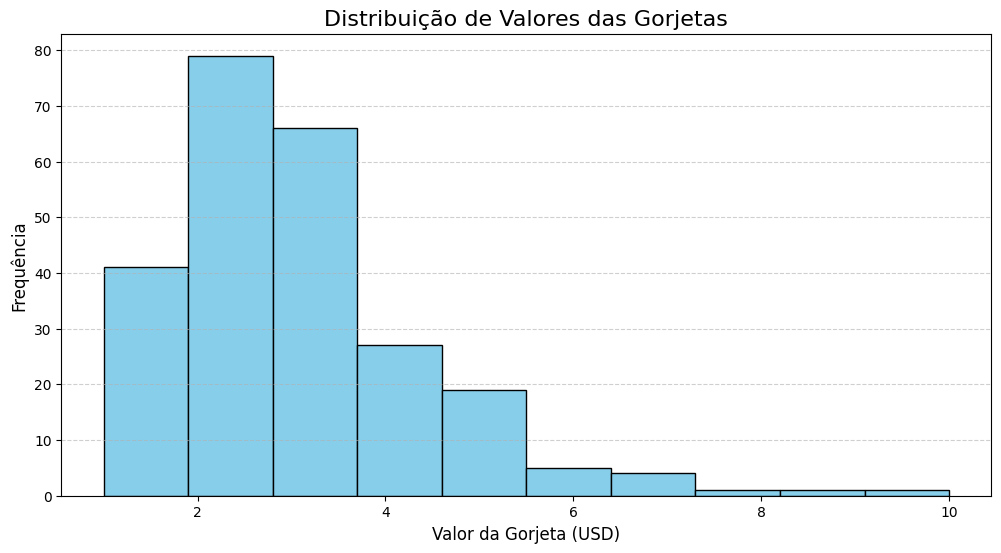

In [ ]:
# Configura o tamanho da figura
plt.figure(figsize=(12, 6))

# Cria um histograma utilizando o Matplotlib. O primeiro parâmetro contém a série de dados com os valores
# dos quais se deseja analisar a frequência. O parâmetro "bins" define o número de divisões que serão utilizadas
# para agrupar os valores. Os demais parâmetros ajustam a estética do gráfico.
plt.hist(tips["tip"], bins=10, color="skyblue", edgecolor="black")

# Configura opções gerais de vizualização do gráfico
plt.title("Distribuição de Valores das Gorjetas", fontsize=16)
plt.xlabel("Valor da Gorjeta (USD)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.xlim((0,11))
# plt.xticks(np.arange(0, 11, 0.5))

plt.show()

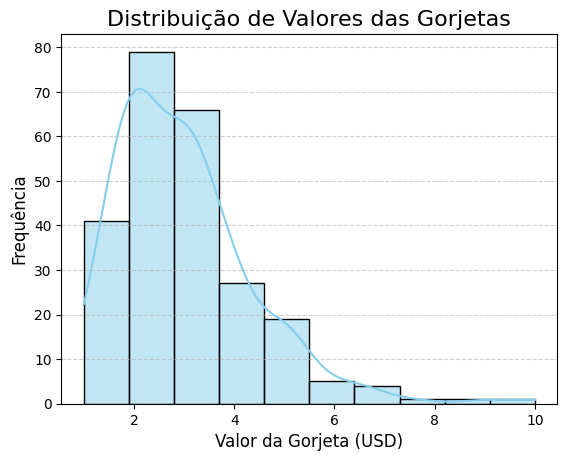

In [ ]:
# Exemplo utilizando o seaborn
import seaborn as sns
# Observe o kde
sns.histplot(tips["tip"], bins=10, color="skyblue", edgecolor="black", kde=True)

plt.title("Distribuição de Valores das Gorjetas", fontsize=16)
plt.xlabel("Valor da Gorjeta (USD)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


## **1.2-Gráfico de Linhas**
---
<p align="justify">
Este notebook apresenta exemplos da criação de gráficos de linha utilizando o matplotlib. Gráficos de linha são úteis para a análise de variáveis onde os dados apresentam uma relação de continuidade, como por exemplo tempo ou distância. Alguns de seus principais usos incluem:
</p>

- Representar dados contínuos;
- Mostrar tendências ao longo do tempo;
- Identificar picos, vales e padrões sazonais;
- Previsão e análise de tendências futuras.

<p align="justify">
Neste notebook iremos utilizar um conjunto de dados fictício para criar gráficos de linha. Este conjunto de dados simula um experimento realizado para verificar o tempo de resposta de um servidor Web de acordo com o número de conexões simultâneas. Este dataset encontra-se disponível no arquivo <strong>network_latency.csv</strong>.
</p>
<p align="justify">
Primeiramente iremos carregar as bibliotecas que utilizaremos ao longo da atividade. Iremos utilizar o Pandas para carregar e manipular dados e o Matplotlib para a geração de gráficos.
</p>

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

<p align="justify">
Em seguida iremos carregar o conjunto de dados com os resultados dos experimentos realizados.
</p>

- O conjunto de dados simula um experimento que avalia a latência de resposta de um servidor HTTP;
- O experimento avalia a latência variando o número de conexões simultâneas entre 10 e 100;
- Considera-se que cada cenário foi executado múltiplas vezes, e o conjunto de dados apresenta a tendência central observada para a latência do servidor;
- A tendência central inclui os valores de média, desvio padrão e margem de erro.

In [ ]:
net_latency = pd.read_csv("https://raw.githubusercontent.com/irajamuller/data_science/main/dataset/network_latency.csv")
net_latency

O exemplo abaixo gera um gráfico de linhas simples que relaciona o número de conexões simultâneas (eixo horizontal) com a latência média (eixo vertical)

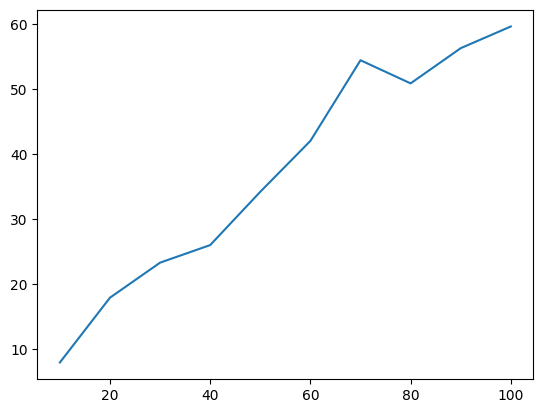

In [ ]:
plt.plot(net_latency["Clients"], net_latency["Latency Mean (ms)"])
plt.show()

Podemos utilizar os métodos e atributos da classe <strong>pyplot</strong> para personalizar aspectos do gráfico como fontes, eixos, legenda, grade. O exemplo abaixo expande o gráfico acima com uma série de detalhes básicos.

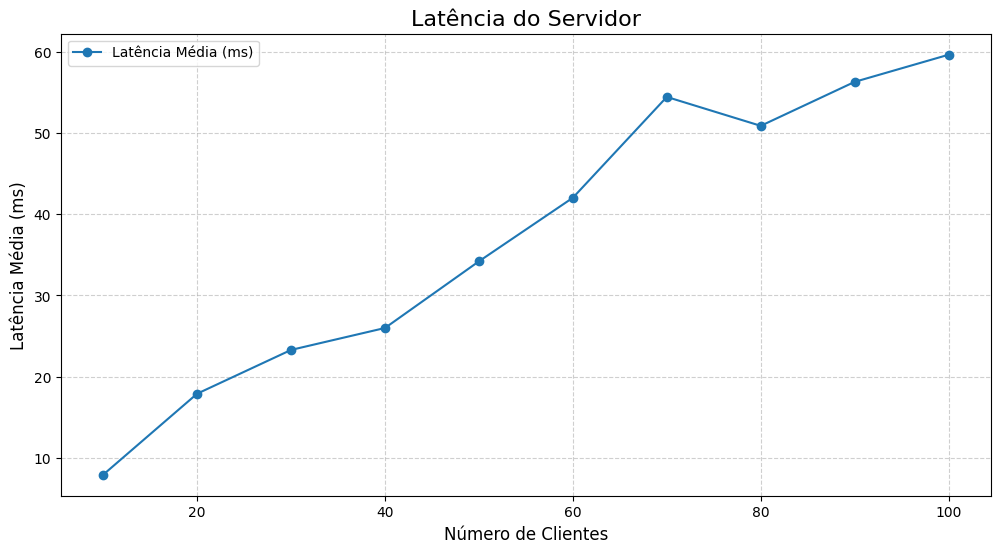

In [ ]:
# Define o tamanho da figura em centímetros
plt.figure(figsize=(12, 6))
# O parâmetro "marker" irá adicionar um ponto para marcar cada um dos valores presentes no dataset.
# O parâmetro "label" define a etiqueta da linha gerada, que será apresentado na legenda do gráfico.
plt.plot(net_latency["Clients"], net_latency["Latency Mean (ms)"], marker='o', label="Latência Média (ms)")

# Define o título do gráfico e seu tamanho de fonte
plt.title("Latência do Servidor", fontsize=16)
# Define o nome do eixo horizontal e seu tamanho de fonte
plt.xlabel("Número de Clientes", fontsize=12)
# Define o nome do eixo vertical e seu tamanho de fonte
plt.ylabel("Latência Média (ms)", fontsize=12)
# Define os parâmetros da grade para marcação do gráfico
plt.grid(True, linestyle="--", alpha=0.6)
# Ativa a exibição da legenda
plt.legend()
# Exibe o gráfico na saída do Jupyter
plt.show()

Além do gráfico de linhas clássico, também podemos criar um gráfico de linha com barras de erro. Este gráfico permite analisar a tendência de uma variável ao longo do tempo e, ao mesmo tempo, verificar a variância observada ao longo das medições. A célula abaixo apresenta um exemplo geração de um gráfico de linhas com barras de erro.

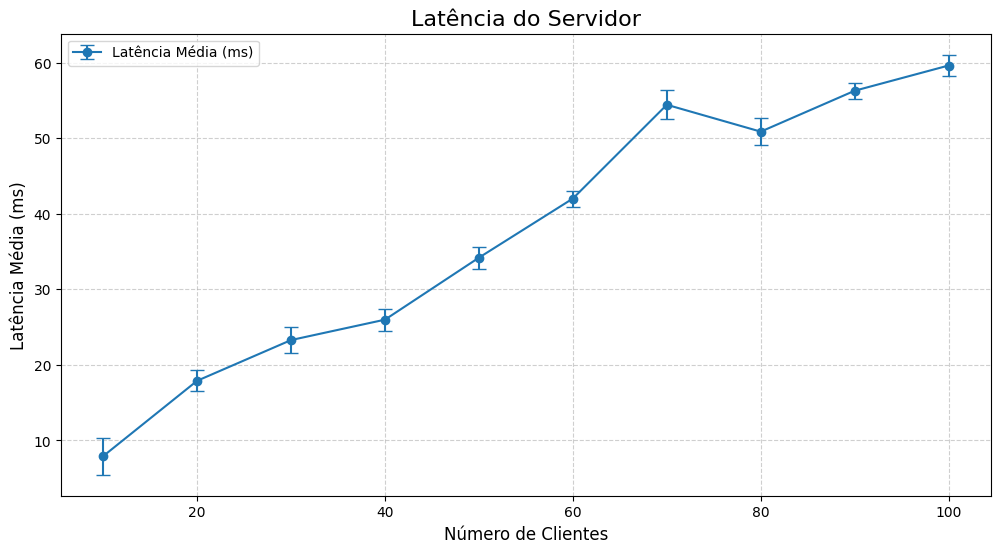

In [ ]:
plt.figure(figsize=(12, 6))
plt.errorbar(
    net_latency["Clients"], # Coluna do eixo horizontal
    net_latency["Latency Mean (ms)"], # Coluna do eixo vertical
    yerr=net_latency["Margin of Error (ms)"], # Coluna com os valores de erro
    fmt='-o', # String com o formato para cada ponto presente no conjunto de dados
    capsize=5, # Tamanho do traço de mínimo e máximo para a barra de erro
    label="Latência Média (ms)" # etiqueta para identificar a linha na legenda
)

# Configurações do gráfico
plt.title("Latência do Servidor", fontsize=16)
plt.xlabel("Número de Clientes", fontsize=12)
plt.ylabel("Latência Média (ms)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

O próximo exemplo mostra como podemos criar um gráfico de linhas que compara a tendência de diferentes variáveis. O conjunto de dados será similar ao anterior, mas desta vez ele irá trazer dados de experimentos realizados com diferentes servidores HTTP. Para isso, adicionamos uma coluna a mais no conjunto de dados identificando a qual servidor Web um resultado pertence.

**Observação: estes dados são fictícios.**

In [ ]:
http_latency = pd.read_csv("https://raw.githubusercontent.com/irajamuller/data_science/main/dataset/http_latency.csv")
http_latency

,Server,Clients,Latency Mean (ms),Latency Std (ms),Margin of Error (ms)
0,nginx,10,17.483571,2.545475,1.280997
1,nginx,20,19.308678,2.550214,1.283382
2,nginx,30,28.238443,2.912727,1.465815
3,nginx,40,37.615149,3.574269,1.798733
4,nginx,50,33.829233,3.295835,1.658612
5,nginx,60,38.829315,2.873687,1.446169
6,nginx,70,52.896064,3.835559,1.930225
7,nginx,80,53.837174,2.418482,1.217089
8,nginx,90,52.652628,2.876434,1.447551
9,nginx,100,62.712800,3.099086,1.559599


Para gerarmos um gráfico deste dataset precisamos realizar processamentos adicionais para gerarmos linhas individuais para os resultados de cada servidor HTTP. Este processamento utiliza as funções de filtragem e seleção disponíveis no Pandas, as quais iremos estudar mais a fundo mais adiante na disciplina.

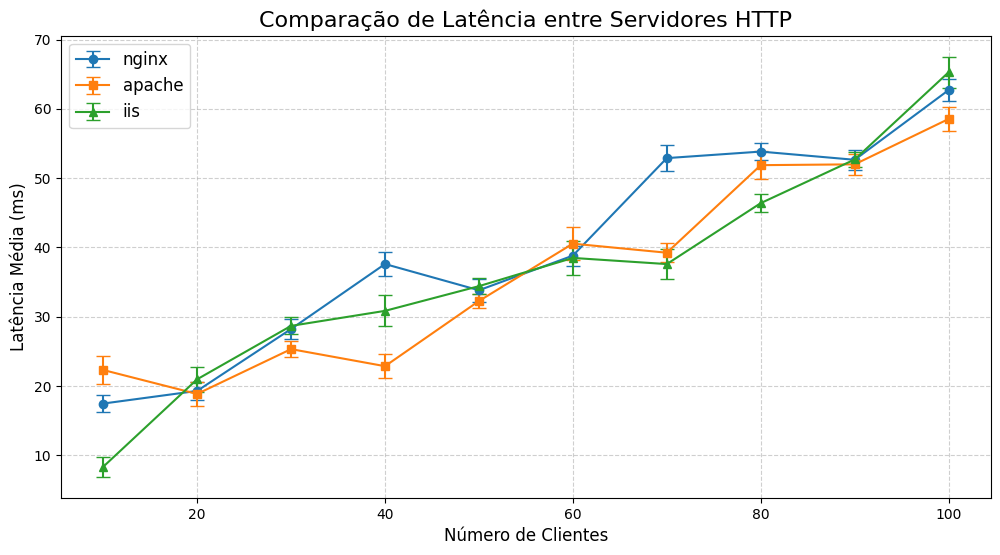

In [ ]:
# Cria uma lista de símbolos para serem usados como marcadores de pontos nos gráficos a serem criados.
# Uma lista dos símbolos suportados está disponível na documentação do Matplotlib.
markers = ['o', 's', '^']

# Configura o tamanho da figura.
plt.figure(figsize=(12, 6))

# Processa os dados para criar um gráfico de linhas comparando os resultados de diferentes servidores.
# O processamento irá enumerar todos os servidores distintos presentes nos dados. Em seuigda, ele irá
# criar um subconjunto de dados para cada servidor e criará um gráfico do tipo errorbar.
for i, server in enumerate(http_latency["Server"].unique()):
    server_data = http_latency[http_latency["Server"] == server]
    plt.errorbar(
        server_data["Clients"],
        server_data["Latency Mean (ms)"],
        yerr=server_data["Margin of Error (ms)"],
        label=f"{server}",
        marker=markers[i % len(markers)],
        capsize=5
    )

# Configurações do gráfico
plt.title("Comparação de Latência entre Servidores HTTP", fontsize=16)
plt.xlabel("Número de Clientes", fontsize=12)
plt.ylabel("Latência Média (ms)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.show()

## **1.3-Gráfico de Linhas com Seaborn**
---
<p align="justify">
Neste notebook iremos criar um gráfico de linhas utilizando a biblioteca Seaborn. Iremos utilizar o conjunto de dados contido no arquivo <strong>http_latency.csv</strong>, o qual apresenta os resultados de uma série de experimentos de latência realizados com diferentes servidores HTTP. Este é o mesmo conjunto de dados que utilizamos anteriormente para gerar gráficos com o Matplotlib. <strong>Observação:</strong> Este conjunto de dados apresenta valores fictíceos.
</p>

<p align="justify">
Neste exemplo iremos utilizar a biblioteca Pandas para gerenciar o conjunto de dados e a Seaborn para gerar o gráfico de linhas. Também iremos utilizar a biblioteca Matplotlib para realizar ajustes finos no gráfico. Vale lembrar que esta combinação é possível porque a Seaborn utliza a Matplotlib como motor para geração de gráficos.
</p>

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Em seguida iremos carregar o conjunto de dados disponível no arquivo http_latency.csv.
net_latency = pd.read_csv("https://raw.githubusercontent.com/irajamuller/data_science/main/dataset/http_latency.csv")
net_latency

,Server,Clients,Latency Mean (ms),Latency Std (ms),Margin of Error (ms)
0,nginx,10,17.483571,2.545475,1.280997
1,nginx,20,19.308678,2.550214,1.283382
2,nginx,30,28.238443,2.912727,1.465815
3,nginx,40,37.615149,3.574269,1.798733
4,nginx,50,33.829233,3.295835,1.658612
5,nginx,60,38.829315,2.873687,1.446169
6,nginx,70,52.896064,3.835559,1.930225
7,nginx,80,53.837174,2.418482,1.217089
8,nginx,90,52.652628,2.876434,1.447551
9,nginx,100,62.712800,3.099086,1.559599


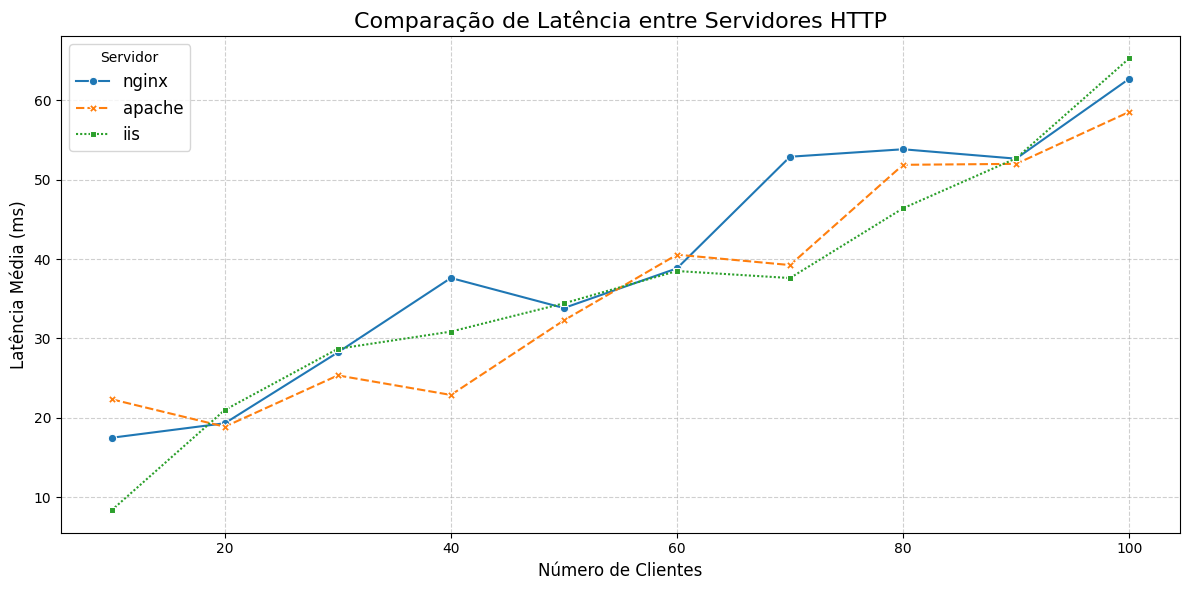

In [ ]:
# Utilizamos a classe "pyplot" do Matplotlib para ajustar o tamanho da figura do Seaborn
plt.figure(figsize=(12, 6))

# Gera um gráfico de linhas utilizando o Seaborn. O parâmetro "data" define o dataframe que contém
# os dados utilizados para geração do gráfico. O parâmetros "x" e "y" especificam as colunas
# do dataframe que contém os valores para os eixos horizontal e vertical, respectivamente.
# os parâmetros "hue" e "style" são utilizados para definir a coluna do dataframe que
# categorizará o gráfico, dividindo os valores entre diferentes linhas. Estes parâmetros também
# definem que cada linha terá estilos e cores distintas, divididas de acordo com as categorias.
# Por fim, o parâmetro "markers" especifica que cada registro no dataframe terá um marcador na linha.
sns.lineplot(
    data=net_latency,
    x="Clients",
    y="Latency Mean (ms)",
    hue="Server",
    style="Server",
    markers=True,
)

# Podemos utilizar a classe "pyplot" do Matplotlib para configurar aspectos gerais do gráfico.
plt.title("Comparação de Latência entre Servidores HTTP", fontsize=16)
plt.xlabel("Número de Clientes", fontsize=12)
plt.ylabel("Latência Média (ms)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Servidor", fontsize=12)
plt.tight_layout()
plt.show()

## **1.4-Gráfico de Caixa**
---
<p align="justify">
Gráficos de caixa (também conhecidos como <strong>box plots</strong>) são uma representa gráfica que resume a distribuição de um conjunto de dados em termos estatísticos. Ele é composto por elementos que permitem identificar rapidamente:
</p>

- Mediana
- Quartis e intervalo entre quartis
- Intervalos de distribuição de valores
- Outliers

<p align="justify">
Neste notebook iremos utilizar o conjunto de dados <strong>tips</strong> disponível através do Seaborn para criar um gráfico de caixas para análisar os valores de gorjetas de acordo com o dia da semana. Para isso, precisaremos processar o conjunto de dados para separá-lo em estatísticas diárias.
</p>

<p align="justify">
Primeiramente iremos carregar as bibliotecas que utilizaremos ao longo da atividade. Iremos utilizar o Pandas para carregar e manipular dados e o Matplotlib para a geração de gráficos.
</p>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Para gerar os gráficos de caixa com as tendências por dia da semana, precisaremos agrupar os dados de acordo com este atributo. Para isso, utilizaremos os métodos do Pandas para realizar essa divisão.

In [ ]:
# Carregar o dataset "tips"
tips = sns.load_dataset("tips")
# Cria uma série contendo cada uma das categorias disponíveis no atributo "day"
days = tips["day"].unique()
# Cria uma lista de séries, onde cada série contém os valores de gorjeta de um dia da semana específico.
grouped_data = [tips[tips["day"] == day]["tip"] for day in days]

Com os dados preparados, podemos criar o gráfico de caixas. O gráfico conterá uma caixa para cada um dos dias da semana.

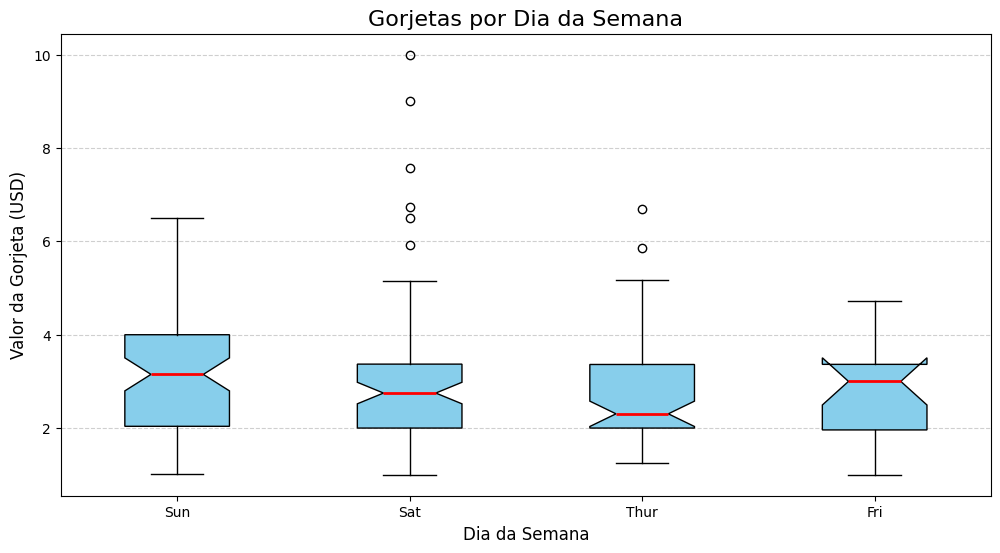

In [ ]:
# Configura o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Cria um gráfico de caixas utilizando o matplotlib. O primeiro parâmetro contém a a lista
# com as séries de dados para cada uma das categorias. O parâmetro "tick_labels" contém uma lista
# com os nomes de cada uma das categorias na mesma ordem e que elas aparecem na lista no primeiro
# parâmetro. Os demais parâmetros definem diversas questões estéticas sobre como as caixas
# serão apresentadas no gráfico.
plt.boxplot(grouped_data, tick_labels=days, patch_artist=True, notch=True,
            boxprops=dict(facecolor="skyblue", color="black"),
            medianprops=dict(color="red", linewidth=2),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"))

# Configura parâmetros gerais do gráfico.
plt.title("Gorjetas por Dia da Semana", fontsize=16)
plt.xlabel("Dia da Semana", fontsize=12)
plt.ylabel("Valor da Gorjeta (USD)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

## **1.5-Gráfico de Dispersão**
---
<p align="justify">
Gráficos de dispersão (também conhecidos como *scatter plot*) é uma representação visual que utiliza poontos em um plano para exibir os valores de duas variáveis. Ele permite uma análise visual da relação entre duas variáveis e a identificação de elementos como:
</p>

- Relações entre duas variáveis;
- Padrões ou tendências;
- Outliers.

<p align="justify">
Neste notebook iremos criar um gráfico de dispersão baseado no conjunto de dados **tips** ue pode ser facilmente acessado através da biblioteca Seaborn. Primeiramente iremos carregar as bibliotecas necessárias para trabalhar com o conjunto de dados. Também iremos carregar o conjunto de dados utilizando a biblioteca Seaborn.
</p>

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

Nosso objetivo será comparar os valores de gorjeta com o valor total da contas de cada um dos registros do conjuntos de dados. Ambos valores já estão disponíveis no conjunto de dados.

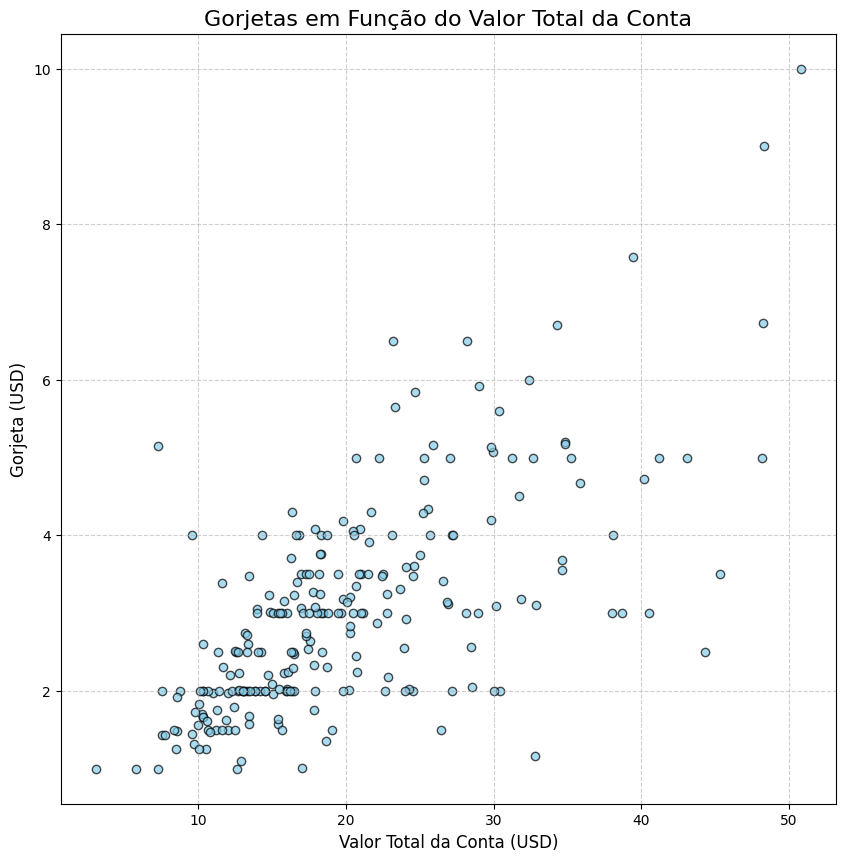

In [ ]:
# Configura o tamanho da figura
plt.figure(figsize=(10, 10))

# Cria um gráfico de dispersão utilizando o Matplotlib.
# O primeiro e segundo parâmetros especificam, respectivamente, as séries contendo
# os valores para os eixos horizontal e vertical. Os demais parâmetros definem
# a estética do gráfico gerado.
plt.scatter(tips["total_bill"], tips["tip"], color="skyblue", alpha=0.7, edgecolor="black")

# Configura parâmetros gerais do gráfico
plt.title("Gorjetas em Função do Valor Total da Conta", fontsize=16)
plt.xlabel("Valor Total da Conta (USD)", fontsize=12)
plt.ylabel("Gorjeta (USD)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## **1.6-Gráfico de Dispersão com Seaborn**
---
<p align="justify">
Neste notebook iremos repetir o exemplo do uso do gráfico de dispersão para relacionar os dados contidos no conjunto <strong>tips</strong>. Porém, desta vez, iremos utilizar o Seaborn como biblioteca para geração do gráfico.
</p>
<p align="justify">
Neste exemplo iremos carregar o conjunto de dados de exemplo através da própria biblioteca Seaborn e utilizá-la para a geração do gráfico. Também iremos utilizar a biblioteca Matplotlib para realizar ajustes finos na imagem.
</p>

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o conjunto de dados de exemplo "tips" através da biblioteca Seaborn.
tips = sns.load_dataset("tips")

Com o dataset carregado, podemos utilizar os métodos da Seaborn e Matplotlib para gerar um gráfico de dispersão.

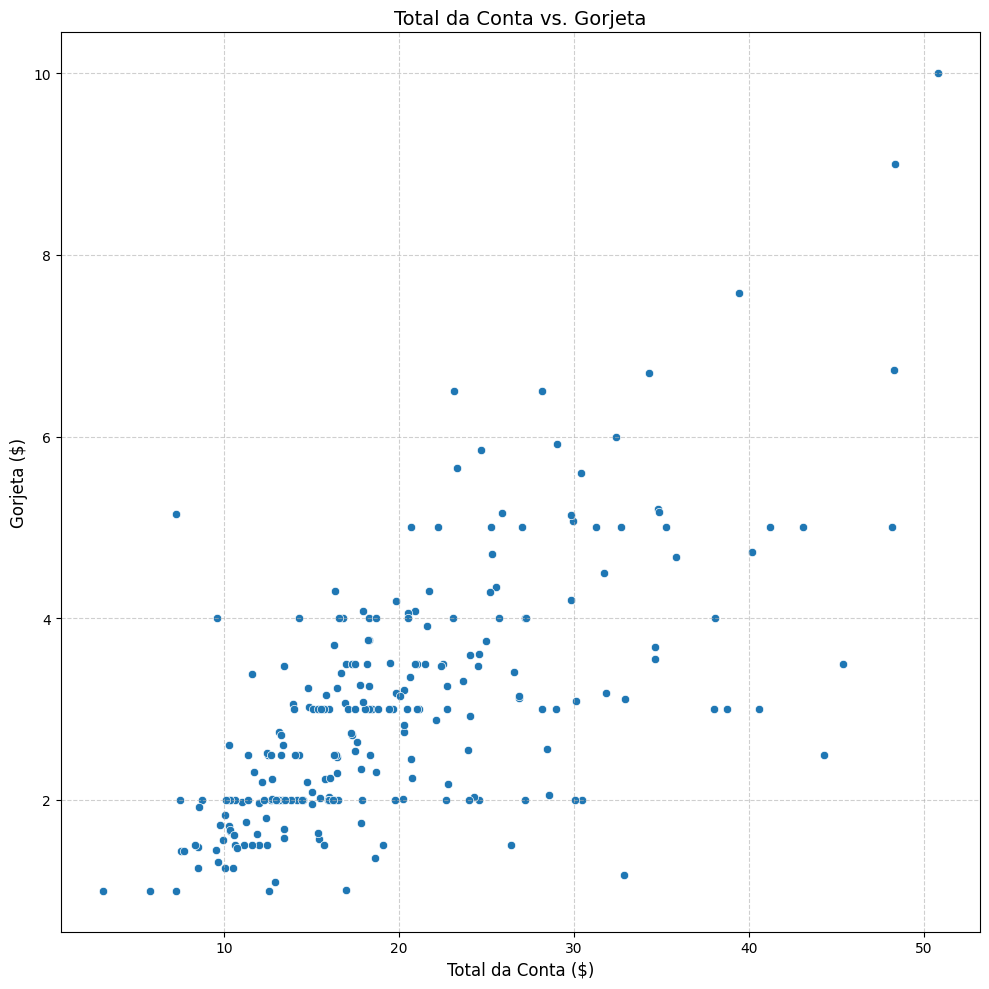

In [ ]:
# Utilizamos a classe "pyplot" do Matplotlib para ajustar o tamanho da figura do Seaborn
plt.figure(figsize=(10, 10))

# Cria um gráfico de dispersão utilizando a Seaborn. O parâmetro "data" especifica o dataframe que
# contém os dados utilizados para geração do gráfico. Os parâmetros "x" e "y" especificam as colunas
# do dataframe que contém os valores utilizados nos eixos horizontal e vertical, respectivamente.
sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
)

# Podemos utilizar a classe "pyplot" do Matplotlib para configurar aspectos gerais do gráfico.
plt.title("Total da Conta vs. Gorjeta", fontsize=14)
plt.xlabel("Total da Conta ($)", fontsize=12)
plt.ylabel("Gorjeta ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

O Seaborn também permite facilmente utilizar os atributos do conjunto de dados para categorizar os valores apresentados na dispersão. No exemplo abaixo iremos utilizar o atributo `time` para realizar a categorização.

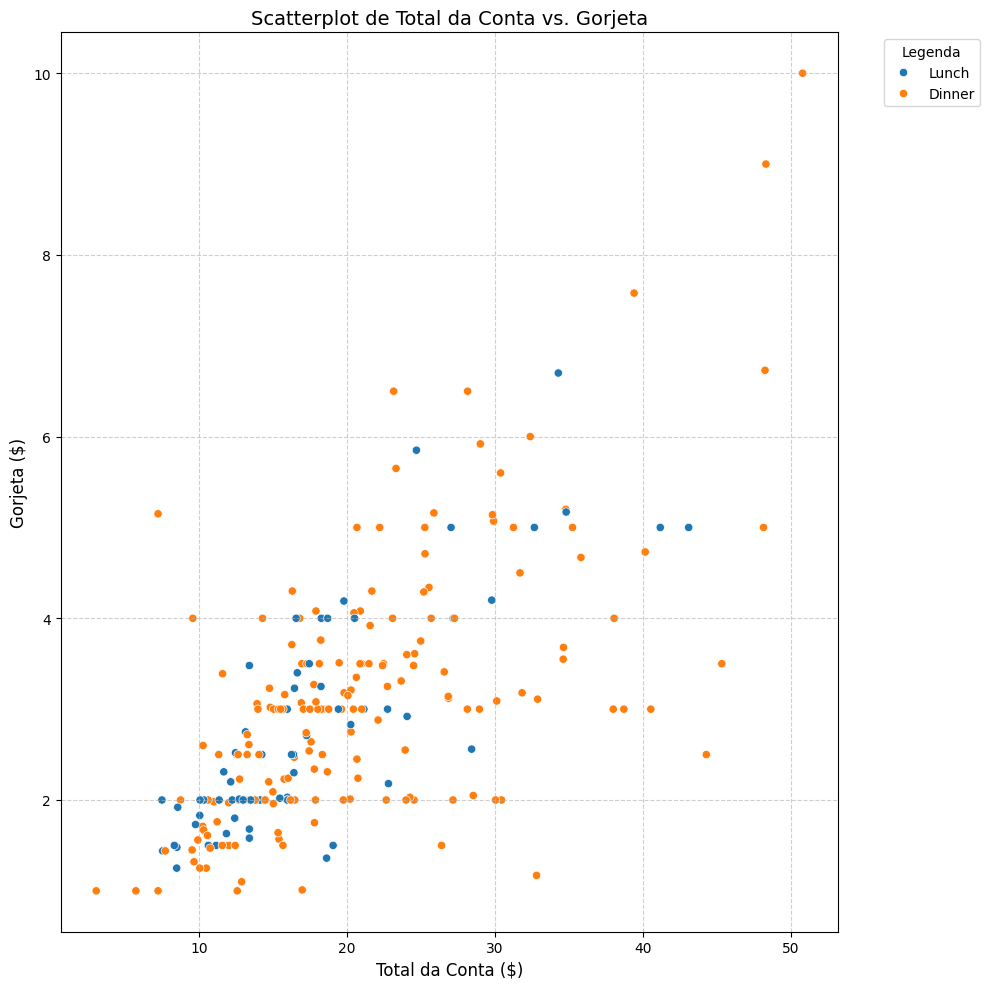

In [ ]:
# Utilizamos a classe "pyplot" do Matplotlib para ajustar o tamanho da figura do Seaborn
plt.figure(figsize=(10, 10))

# Cria um gráfico de dispersão utilizando a Seaborn. Comparado com o exemplo acima, temos a adição
# do parâmetro "hue", que define a coluna do dataframe que será utilizada para categorizar os pontos
# com cores diferentes.
sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="time"
)

# Podemos utilizar a classe "pyplot" do Matplotlib para configurar aspectos gerais do gráfico.
plt.title("Scatterplot de Total da Conta vs. Gorjeta", fontsize=14)
plt.xlabel("Total da Conta ($)", fontsize=12)
plt.ylabel("Gorjeta ($)", fontsize=12)
plt.legend(title="Legenda", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## **1.7-Múltiplos Gráficos de Dispersão**
---
<p align="justify">
Este notebook apresenta um exemplo do Matplotlib com múltiplos gráficos de dispersão apresentados em um formato de grade. Este exemplo utiliza novamente o conjunto de dados <strong>tips</strong> disponível através da biblioteca Seaborn.
</p>
<p align="justify">
Utilizaremos a Matplotlib como biblioteca para plotagem do gráfico e o Pandas para manipulação do conjunto de dados.
</p>

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

De forma geral, o processo para gerar o gráfico segue as seguintes etapas:

- Carregar o conjunto de dados <strong>tips</strong>;
- Criar uma lista das categorias disponíveis no atributo <strong>day</strong>;
- Criar uma instância da classe subplots para a criação de um gráfico com múltiplos <strong>axes</strong>;
- Iterar pela lista de categorias e criar um gráfico de dispersão para cada dia da semana.

In [ ]:
# Carregar o conjunto de dados "tips"
tips = sns.load_dataset("tips")
# Criar uma lista com as categorias presentes no atributo "day"
days = tips["day"].unique()
print(days)

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']


A classe <strong>subplots</strong> permite a criação de um gráfico composto por múltiplos subgráficos que podem ser gerenciados de forma individual. Cada subgráfico pode ser acessado e manipulado individualmente através de uma lista de `axes` indexada numericamente. No código abaixo, iremos iterar pela lista de <strong>axes</strong> e criar um gráfico em cada região do <strong>subplot</strong>.

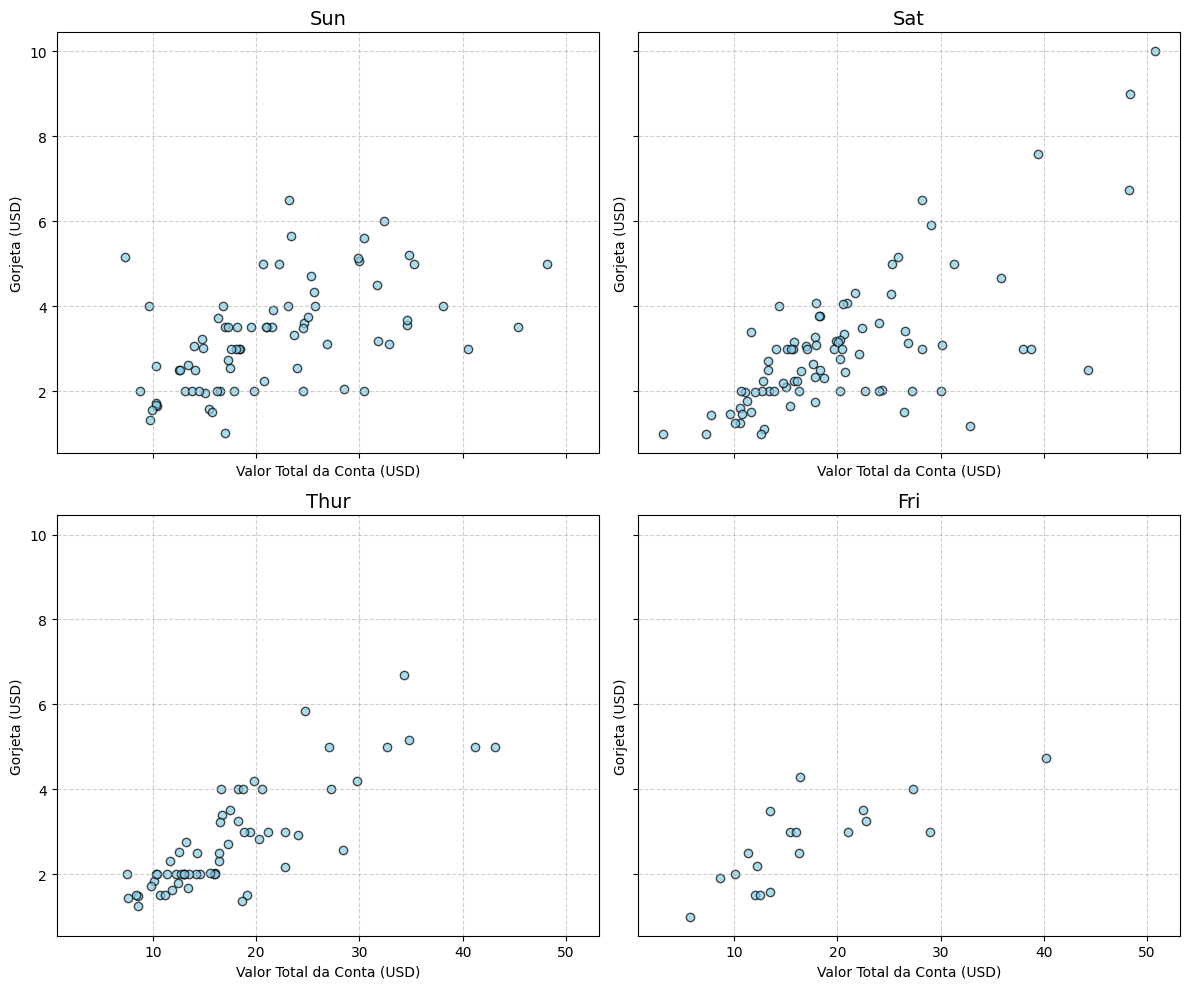

In [ ]:
# Cria um objeto de subplot com uma grade 2x2 para quatro gráficos. Também define o tamanho do gráfico.
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
# O método abaixo transforma a grade de axes em uma lista de uma dimensão para facilitar a iteração.
axes = axes.flatten()

# A iteração abaixo passa por cada elemento da lista de categorias e realiza a criação de um gráfico
# de dispersão para os dados de gorjeta de um dia da semana específico. Cada gráfico será posicionado
# em um dos elementos da grade de subplots criada acima.
for i, day in enumerate(days):
    # Seleciona uma das posições da grade de subplots para inserir o gráfico da iteração atual
    ax = axes[i]
    # Cria um dataframe filtrando os dados de gorjeta pela categoria definida na iteração atual
    day_data = tips[tips["day"] == day]
    # Cria o gráfico de dispersão com os dados filtrados e o posiciona na célula selecionada
    ax.scatter(day_data["total_bill"], day_data["tip"], color="skyblue", alpha=0.7, edgecolor="black")
    ax.set_title(f"{day}", fontsize=14)
    ax.set_xlabel("Valor Total da Conta (USD)")
    ax.set_ylabel("Gorjeta (USD)")
    ax.grid(True, linestyle="--", alpha=0.6)

# Ajusta opções gerais do gráfico gerado e o exibe.
plt.tight_layout()
plt.show()

## **1.8-Gráfico de Caixa com Dispersão (combinação)**
---
<p align="justify">
Este notebook apresenta um exemplo de gráfico que combina um gráfico de caixa com um gráfico de dispersão para uma análise mais detalhada dos valores estatísticos de uma variável dividida em múltiplas categorias. Iremos utilizar como base o conjunto de dados <strong>tips</strong> que pode ser acessado através da biblioteca Seaborn, processando-o para dividi-lo de acoro com as categorias da coluna <strong>day</strong>.
</p>

<p align="justify">
Iremos utilizar as bibliotecas Matplotlib para geração dos gráficos, além da Pandas e NumPy para o processamento do conjunto de dados.
</p>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Iremos carregar o conjunto de dados <strong>tips</strong> utilizando a biblioteca Seaborn. Em seguida, iremos identificar as categorias presentes na coluna <strong>day</strong> e criar conjuntos de dados individuais filtrados de acordo com os valores desta coluna.

In [ ]:
# Carregar o dataset "tips"
tips = sns.load_dataset("tips")

# Agrupar os dados por dia
days = tips["day"].unique()
grouped_data = [tips[tips["day"] == day]["tip"] for day in days]

De forma geral, seguiremos os seguintes passos para gerar o gráfico combinado:

- Criar uma lista contendo o número total de posições necessárias no eixo horizontal do gráfico para exibição de um gráfico de caixa e um gráfico de caixas para cada uma das categorias identificadas;
- Criar os gráficos de caixa para cada dia da semana e inserí-los em posições intercaladas no eixo horizontal;
- Criar os gráficos de dispersão para cada dia da semana e inserí-los ao lado dos gráficos de caixa.

In [ ]:
# Configura o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Cria um ndarray para controlar o posicionamento dos elementos em relação ao eixo horizontal do gráfico
positions_boxplot = np.arange(len(days)) * 2

# Cria um boxplot utilizando os dados contidos em "grouped_data". O parâmetro "positions" configura
# a posição dos gráficos de caixa de modo que haja espaço pra os gráficos de dispersão para cada categoria
plt.boxplot(grouped_data, positions=positions_boxplot, widths=0.6, patch_artist=True, notch=True,
            boxprops=dict(facecolor="lightgray", color="black"),
            medianprops=dict(color="red", linewidth=2),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"))

# Cria um novo ndarray com as posições deslocadas em relação aos gráficos de caixa
# para posicionamento dos gráficos de dispersão.
positions_scatter = positions_boxplot + 0.8

# Os gráficos de dispersão precisam ser criados individualmente para cada classe. Para isso,
# realizamos uma iteração sobre cada uma das categorias e criamos um gráfico de dispersão
# com o deslocamento apropriado.
for i, day_data in enumerate(grouped_data):
    # Por padrão, todos os pontos do gráfico de dispersão ficariam posicionados no mesmo ponto
    # em relação ao eixo horizontal. Para criar um leve deslocamento entre os pontos, criamos
    # um objeto com uma distribuição aleatória uniforme que será utilizado junto ao método de
    # geração do scatterplot.
    jitter = np.random.uniform(-0.2, 0.2, size=len(day_data))
    # Gera o scatterplot para a categoria da iteração atual. A posição horizontal de cada ponto
    # será definida por uma posição pré-definida no eixo horizontal (positions_scatter) mais um
    # deslocamento aleatório (jitter). A posição no eixo vertical será definida unicamento pelo
    # valor do atributo day_data, que contém os valores de gorjeta extraídos da categoria.
    plt.scatter(positions_scatter[i] + jitter, day_data, alpha=0.7, color="skyblue", edgecolor="black", label=f"Scatter: {days[i]}" if i == 0 else "")

# Configura parâmetros gerais do gráfico.
plt.title("Gorjetas por Dia da Semana", fontsize=16)
plt.xlabel("Dia da Semana", fontsize=12)
plt.ylabel("Valor da Gorjeta (USD)", fontsize=12)
plt.xticks((positions_boxplot + positions_scatter) / 2, days, fontsize=10)  # Rótulos entre os grupos
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

## **1.9-Matriz de Confusão**
---
<p align="justify">
Um gráfico importante para o aprendizado de máquina supervisionado é a matriz de confusão. Este gráfico permite visualizar de forma clara o desempenho de um modelo de aprendizado através da comparação entre as categorias previstas pelo modelo com aquelas contidas em um conjunto de dados de referência.
</p>

<p align="justify">
A biblioteca Seaborn suporta a geração de mapas de calor, os quais podem ser utilizados para gerar matrizes de confusão. Para gerar a matriz de confusão, precisaremos gerar uma tabela cruzada que apresenta a contagem de ocorrências de todas as combinações entre classes previstas e reais. Esta tabela pode ser facilmente gerada através do método <strong>crosstab</strong> disponível na biblioteca Pandas.
</p>

<p align="justify">
Este notebook apresenta um exemplo de criação de uma matriz de confusão baseada em um conjunto de dados que apresenta as classes preditas e reais para um modelo de aprendizado fictício. Utilizaremos as bibliotecas Seaborn e Matplotlib para gerar e ajustar os detalhes do gráfico. Também utilizaremos a biblioteca Pandas para processar o conjunto de dados bruto e gerar a tabela cruzada.
</p>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<p align="justify">
Utilizaremos um dataset fictício que apresenta duas colunas. A primeira, <strong>True Labels</strong>, apresenta as classes de referência contidas no conjunto de dados utilizado para testar o modelo de aprendizado. A segunda, <strong>Predicted Labels</strong>, apresenta os valores preditos pelo modelo de aprendizado que está sendo avaliado. O conjunto de dados de testes está contido no arquivo <strong>confusion.csv</strong>.
</p>

In [ ]:
# Carregar o arquivo CSV
data = pd.read_csv("https://raw.githubusercontent.com/irajamuller/data_science/main/dataset/confusion.csv")
data.head()

,True Labels,Predicted Labels
0,2,2
1,3,3
2,0,0
3,2,2
4,2,2


Para gerar a matriz de confusão, precisamos converter o conjunto de dados acima em uma tabela cruzada. Para isso, podemos utilizar o método <strong>crosstab</strong> disponível na biblioteca Pandas.

In [ ]:
conf_matrix = pd.crosstab(
    index=data["True Labels"],
    columns=data["Predicted Labels"]
)
conf_matrix

Predicted Labels,0,1,2,3
True Labels,,,,
0,247,3,4,4
1,7,217,0,6
2,4,7,220,1
3,8,6,4,262


Com a tabela cruzada criada podemos utilizar a biblioteca Seaborn para criar um gráfico de heatmap que apresenta a matriz de confusão com o desempenho do modelo de aprendizado fictício.

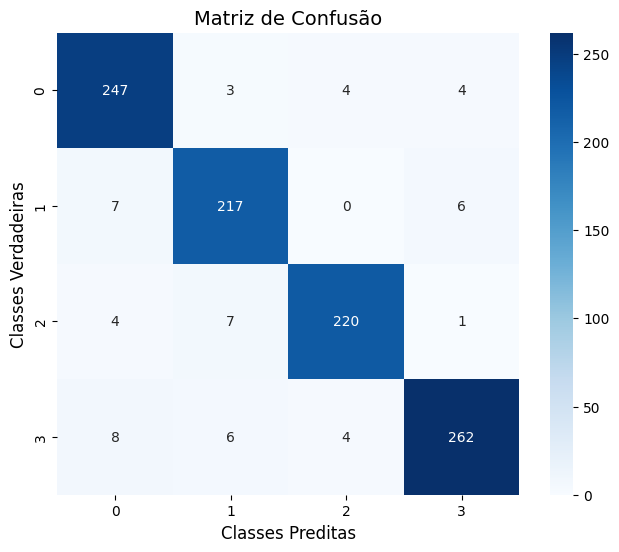

In [ ]:
# Utilizamos a classe "pyplot" do Matplotlib para ajustar o tamanho da figura do Seaborn
plt.figure(figsize=(8, 6))

# Cria um gráfico de heatmap utilizando a Seaborn. O primeiro parâmetro contém a tabela cruzada com
# os valores da matriz de confusão gerada com o método "crosstab" do Pandas. Os demais parâmetros
# configuram a estética do mapa de calor.
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt=".0f", cbar=True, square=True)

# Podemos utilizar a classe "pyplot" do Matplotlib para configurar aspectos gerais do gráfico.
plt.title("Matriz de Confusão", fontsize=14)
plt.xlabel("Classes Preditas", fontsize=12)
plt.ylabel("Classes Verdadeiras", fontsize=12)
plt.show()